# Twitter! 

This notebook will be divided into many sections. The first few are dedicated to getting you up and running with Twitter. The next few demonstrate some of the things you can do with this package. Then at the end there's an example of how you could use this to answer a simple research question of some sort.

## Getting twython

The first step is acquiring twython on your computer. To do this, the first thing you need to do is get to a command prompt on your computer.

On Windows, click the start button in the bottom left corner, then type "command prompt." Windows will find the command prompt program for you. Click to open.

On Mac, find the terminal program. This is usually in the tray at the bottom of the screen, but may also be in the Launchpad. Click on this (or, you may have to two-finger-click and then click "New Window"). This will open a command prompt.

Once you have a command prompt open, type the following, then press enter:

pip install twython

Give the package installer a moment to install twython. If it succeeds, you can close the command prompt window.

The code cell below imports the twython package so you can use it in this Jupyter notebook. Try running it (hit shift+enter). If you do not receive an error, then you have installed twython successfully!

In [2]:
import twython

## Using twython to access Twitter 

In order to use twython to access Twitter, you need to have access to a Twitter account. We will then set up twython to use that account's credentials to access data on Twitter.

### Creating a Twitter account 

You can skip this step if you already have a Twitter account.

Go to twitter.com and click the sign up button in the top right.

Follow the prompts and fill in your information to create a Twitter account. FOr the next step of this process, you will need to have a valid phone number associated with your account.

### Creating a Twitter app and acquiring authentication keys

To access Twitter with Python, we actually create an app, and access Twitter through that. Follow these steps to set it up:

Go to dev.twitter.com

Sign in if you are not already. You can do this by clicking "Sign In" in the top right corner.

On dev.twitter.com, scroll down to the menus at the very bottom. Under "Tools," click on "Manage Your Apps"

You likely don't have any apps already created, so click on Create New App.

Give you application a name. It doesn't have to be anything special. "____'s First App" will suffice, for example.

Give it a description. It also doesn't matter what you write here, as long as it's more than 10 characters.

Give your app a website. As long as it's a valid website, this also doesn't matter. If you want, you can use our website, which is http://iacs.stonybrook.edu

Don't worry about the Callback URL.

Check the box under the Developer Agreement, and then click Create your Twitter application.

You'll be taken to the main information page for your app. Near the top of the page, you'll see a set of tabs you can click on. Click on Keys and Access Tokens. Near the top of the page are given your Consumer Key (API Key), and Consumer Secret (API Secret). You will need both of these codes. Scrolling down a bit, you will see a button that allows you to generate an Access Token and Access Token Secret. Click this button and both numbers will be displayed on the screen. You will need both of these codes as well. Below is an example of the four codes, stored as strings into 4 different variables. Replace the example codes with the codes you received, and run the cell.

In [3]:
APP_KEY = "Goqb0g5tW80aGDy71F1FUhKtz"                                   #Consumer Key (API Key)
APP_SECRET = "V24EX1JVpYoaHHLyTlf3zShY92zBATnX6iCWFdticLEYx1drnf"       #Consumer Secret (API Secret)
OAUTH_TOKEN = "886759024062066688-vKyZZJLgF3P0AbZZFSlI2tiv4Fp6amZ"      #Access Token
OAUTH_TOKEN_SECRET = "yzaCqfW3gDbwrysrsot7nLlKonQL0eHdCPeQPviGieqMf"    #Access Token Secret

## Using Python to access Twitter 

Now we're ready to start mining Twitter for tweets. The first thing we need to do is create something called a Twython object. An object is essentially a custom data-type that someone else has created. Don't worry too much about it. This will be the only one we use in this notebook. The following cell creates the object and names it twitter.

In [4]:
#Initialize the Twython object
twitter = twython.Twython(APP_KEY, APP_SECRET, OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

Now we can search Twitter through our object, twitter. An efficient way to do this is through a hashtag. So let's make one, and then call a search function on twitter.

In [5]:
myHashtag = "#NYC" #You can change this hashtag to be whatever you want

matchedTweets = (twitter.search(q = myHashtag, count = 100))['statuses']
#Description of the above line:
#myHashtag is the same as the previous line
#count is the number of tweets we want to extract
#Because the search function returns a dictionary, we want the list that is under the key 'statuses'
#So matchedTweets contains a list of tweets. Each tweet is itself a dictionary.

Since we're now running a lot of someone else's code, it's always helpful to know what we're dealing with. This is where the type function can come in handy.

In [6]:
print(type(matchedTweets)) #What is matchedTweets? (hopefully this is a list)
print(type(matchedTweets[0])) #Since matchedTweets is a list, what kind of things does it contain? Check the first element.

<class 'list'>
<class 'dict'>


Ok, so we know we have a list of dictionaries. In order to access the data that's in the dictionary, we need to know the keys. (If each tweet were a list, we would access it with integers 0, 1, 2, etc. But since it's a dictionary, we need to know the strings to use to access the data). We can do this with the keys functions, like this:

In [7]:
matchedTweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

Knowing the keys, we can do a little bit of printing to see what's actually there. You can do this with either a for loop or a while loop. Now that we know what for loops are (or will, if you haven't done the homework yet), let's use one of those.

In [8]:
for tweet in matchedTweets:
    print("ID Number:     ", tweet['id'])
    print("User Handle:   ", tweet['user']['screen_name'])
    print("Text:          ", tweet['text'])
    print("Time Created:  ", tweet['created_at'])
    print("") # Just for readability
    print("") # Just for readability

ID Number:      888419081707302912
User Handle:    cooperphotog
Text:           @SurfRockIsDead at @BabysAllRight in #Williamsburg #NYC.

#NewYork #Brooklyn #culture #lifestyle… https://t.co/Y4CUaA6FSC
Time Created:   Fri Jul 21 15:23:09 +0000 2017


ID Number:      888419039550345217
User Handle:    MNxmasMarket
Text:           RT @212_west: Summer storms have us wishing we were in the city that never sleeps.  #nyc #necklace #jotd https://t.co/x2riTdCyDH
Time Created:   Fri Jul 21 15:22:59 +0000 2017


ID Number:      888418983732539394
User Handle:    itsmisscs
Text:           How is it that the autonomous agency for the people (Community Boards) are not elected by the people? #nyc #g0vnyc #reform
Time Created:   Fri Jul 21 15:22:46 +0000 2017


ID Number:      888418978875494400
User Handle:    marekwrob
Text:           Amazing time searching for inspirations in New York's real estate. #nyc #NewYorkCity #RealEstate #Motivation #Goals… https://t.co/4kXcMIP3hl
Time Created:   Fri Jul 

So lets see how we can refine our search. There are a few tags we can include that will be helpful. To use these, we would include these after our hashtag in the search. After defining them, we will use them in a few examples. I'll list a few of the more useful filters here:  
    - lang                              we can define the language we want our tweets to be in (en is English)  
    - filter:retweets                   this lets us not include retweets  
    - filter:replies                    this lets us not include replies  
    - geocode="string of coords"        with this string  
    - max_id                            we will need this to get older tweets
    - since_id                          we will use this to get newer tweets
    - until                             this lets us put a cap on the date that we want tweets from

In [13]:
myHashtag = "#NYC -filter:retweets -filter:replies" # Getting rid of retweets and replies (this has to go here -
                                                    # its just how the interface was designed)

# When you open a parenthesis in Python, until you provide the closing parenthesis white space 
# has no meaning. This means that I can do the following to help with read-ability of a long
# function call.

matchedTweets = (twitter.search(q = myHashtag,       # The hashtag we are searching on 
                                count = 100,         # The maximum number of tweets we want to keep (100 is max)
                                lang = 'en',         # The language we want our tweets to be in (en is english)
                                until = "2017-7-20"  # We want only tweets before 9-10-2016
                               ))['statuses']        # This ['statuses'] just removes one level of a dictionary
                                                     # that is returned from the search 

Lets print out the tweets we got to make sure it all looks like we expected. I'm just going to use the code we wrote earlier, with a few modifications.

In [14]:
for tweet in matchedTweets:
    print("ID Number:     ", tweet['id'])
    print("User:          ", tweet['user']['screen_name'])
    print("Language:      ", tweet['lang'])
    print("Text:          ", tweet['text'])
    print("Time Created:  ", tweet['created_at'])
    print("") # Just for readability
    print("") # Just for readability

ID Number:      887824320411693058
User:           RKSARTWORLD
Language:       en
Text:           Look Inside Art! #art #artwork #myart #artes #galleryart #gallery #soho #tribeca #nyc #Chelsea… https://t.co/dz1OnYwVk2
Time Created:   Wed Jul 19 23:59:47 +0000 2017


ID Number:      887824255626473472
User:           theupbeatpath
Language:       en
Text:           Getting in some last min #NYC sightseeing before we are out of here for good next week.  #NewYork it's been more th… https://t.co/kbDdDQ1RFx
Time Created:   Wed Jul 19 23:59:32 +0000 2017


ID Number:      887824223279992832
User:           Z9Network
Language:       en
Text:           Machete-wielding man fights man with trash can in #NYC
https://t.co/4VFJF6RvuM
Time Created:   Wed Jul 19 23:59:24 +0000 2017


ID Number:      887824173158027268
User:           CribRater
Language:       en
Text:           4 Ways of #Scoring the #Best #Apartment #Deal in #NYC https://t.co/zE74qLtOwO #CribRater #Crib #RealEstate #Rentals #Apartm

## How To Get Older Tweets

So lets add another 100 tweets to our "matchedTweets" list. To do this, we make use of the 'id' tag our tweets have and the 'max_id' term we can insert in our search. First, we need to find the minimum 'id' value in our list of tweets (remember the higher the 'id' value of a tweet, the more recent it was.) The tweets are actually already ordered chronologically (look at the times in the output from two cells above), so the oldest tweet is the last entry of the list. We can always access the last entry of a list using the -1 index.

In [15]:
# Save the min_id in a variable
our_min_id = matchedTweets[-1]['id'] - 1 # This is a list of dictionaries, so we use [-1] to access the last tweet
                                         # and then ['id'] to access the 'id' variable of that tweet. The -1 makes 
                                         # so that the 'newest' tweet we get in our second search is not the 'oldest'
                                         # tweet from earlier

We can now search for older tweets using the following code.

In [16]:
newTweets = (twitter.search(q = myHashtag,           # The hashtag we are searching on 
                                count = 100,         # The maximum number of tweets we want to keep (100 is max)
                                lang = 'en',         # The language we want our tweets to be in (en is english)
                                max_id = our_min_id  # This says we want tweets who's 'id' value is less than
                                                     # the value we stored in the variable 'our_min_id'
                               ))['statuses']        # This ['statuses'] just removes one level of a dictionary
                                                     # that is returned from the search 

Lets look at our new tweets to make sure they are new. Once again, I just copied this code from above.

In [17]:
for tweet in newTweets:
    print("ID Number:     ", tweet['id'])
    print("User:          ", tweet['user']['screen_name'])
    print("Language:      ", tweet['lang'])
    print("Text:          ", tweet['text'])
    print("Time Created:  ", tweet['created_at'])
    print("") # Just for readability
    print("") # Just for readability

ID Number:      887819396525293568
User:           SubwayStats
Language:       en
Text:           #Gtrain have delays  #NYC https://t.co/NA9Jl98NIL
Time Created:   Wed Jul 19 23:40:13 +0000 2017


ID Number:      887819378435260416
User:           Intertops
Language:       en
Text:           #AussieOpen? Check! #Wimbledon? Check! Is #Federer now set to add the #USOpen to his collection?… https://t.co/WV1NlIRiVN
Time Created:   Wed Jul 19 23:40:09 +0000 2017


ID Number:      887819345958768640
User:           kpkdotcom
Language:       en
Text:           A Madison Square Park Snow Scene  #snow #newyork #nyc #newyorkcity #hdr https://t.co/uWZ8LdgEZC
Time Created:   Wed Jul 19 23:40:01 +0000 2017


ID Number:      887819328388710400
User:           head2headgear
Language:       en
Text:           Every turn in #nyc has a great #view. You can never walk around there too much. #newyork… https://t.co/RHCriOlLiT
Time Created:   Wed Jul 19 23:39:57 +0000 2017


ID Number:      8878191942382182

So these are new tweets. Lets add all our tweets together into one list. We'll print out the length of each list before and after to make sure this does what we think it will.

In [18]:
# Before
print(len(matchedTweets))
print(len(newTweets))

# Add the two lists together
matchedTweets = matchedTweets + newTweets

# After 
print(len(matchedTweets))
print(len(newTweets))

83
76
159
76


Lets print them all, once last time. I want to make sure the chronological order hasn't been messed up in the list addition.

In [19]:
# Our own id to help find the point where the addition happened
our_id = 1

for tweet in matchedTweets:
    print("Our ID:        ", our_id)
    print("ID Number:     ", tweet['id'])
    print("User:          ", tweet['user']['screen_name'])
    print("Language:      ", tweet['lang'])
    print("Text:          ", tweet['text'])
    print("Time Created:  ", tweet['created_at'])
    print("") # Just for readability
    print("") # Just for readability
    our_id += 1

Our ID:         1
ID Number:      887824320411693058
User:           RKSARTWORLD
Language:       en
Text:           Look Inside Art! #art #artwork #myart #artes #galleryart #gallery #soho #tribeca #nyc #Chelsea… https://t.co/dz1OnYwVk2
Time Created:   Wed Jul 19 23:59:47 +0000 2017


Our ID:         2
ID Number:      887824255626473472
User:           theupbeatpath
Language:       en
Text:           Getting in some last min #NYC sightseeing before we are out of here for good next week.  #NewYork it's been more th… https://t.co/kbDdDQ1RFx
Time Created:   Wed Jul 19 23:59:32 +0000 2017


Our ID:         3
ID Number:      887824223279992832
User:           Z9Network
Language:       en
Text:           Machete-wielding man fights man with trash can in #NYC
https://t.co/4VFJF6RvuM
Time Created:   Wed Jul 19 23:59:24 +0000 2017


Our ID:         4
ID Number:      887824173158027268
User:           CribRater
Language:       en
Text:           4 Ways of #Scoring the #Best #Apartment #Deal in #N

ID Number:      887821485666164736
User:           EetuBlomqvist
Language:       en
Text:           The Brownsville Partnership is improving the life of people in Brownsville, Brooklyn by using open data. Data has power! #opendata #nyc
Time Created:   Wed Jul 19 23:48:31 +0000 2017


Our ID:         52
ID Number:      887821450429829122
User:           louretire
Language:       en
Text:           We need to remember this quote when tax cuts are debated
#nyc
#CBOSCORE https://t.co/W1uWTkKrME
Time Created:   Wed Jul 19 23:48:23 +0000 2017


Our ID:         53
ID Number:      887821440145403906
User:           MTAtruth
Language:       en
Text:           #Gtrain have delays #NYC https://t.co/bSHInF1Ahp
Time Created:   Wed Jul 19 23:48:20 +0000 2017


Our ID:         54
ID Number:      887821439415582720
User:           MTAtruth
Language:       en
Text:           #Btrain #Dtrain #Ftrain #Mtrain have delays #NYC https://t.co/bSHInF1Ahp
Time Created:   Wed Jul 19 23:48:20 +0000 2017


Our ID:

I think this looks good. The tweet with "our_id" 90 happened after the tweet with "our_id" 91.

## How To Get Newer Tweets 

Very similar to how we got older tweets, I will now show you how to get newer tweets. First we need to find our newest tweets ID number. We will do this in an almost identical manner to how we got the oldest tweets ID number. Remember the 'newest' tweet will be the zeroth element of the list of returned tweets.

In [20]:
# Save the min_id in a variable
our_max_id = matchedTweets[0]['id']      # This is a list of dictionaries, so we use [0] to access the first tweet
                                         # and then ['id'] to access the 'id' variable of that tweet.

Now that we have 'our_max_id' we can use this variable along with the search parameter 'since_id' to search for new tweets. The following code demonstrates this.

In [21]:
newTweets2 = (twitter.search(q = myHashtag,            # The hashtag we are searching on 
                                count = 100,           # The maximum number of tweets we want to keep (100 is max)
                                lang = 'en',           # The language we want our tweets to be in (en is english)
                                since_id = our_max_id  # This says we want tweets who's 'id' value is greater than
                                                       # the value we stored in the variable 'our_max_id'
                               ))['statuses']          # This ['statuses'] just removes one level of a dictionary
                                                       # that is returned from the search 

Lets look at the newer tweets.

In [22]:
for tweet in newTweets2:
    print("ID Number:     ", tweet['id'])
    print("User:          ", tweet['user']['screen_name'])
    print("Language:      ", tweet['lang'])
    print("Text:          ", tweet['text'])
    print("Time Created:  ", tweet['created_at'])
    print("") # Just for readability
    print("") # Just for readability

ID Number:      888419415666176002
User:           TimHayesNYC
Language:       en
Text:           The #NYCParks have more than 40 beautiful pools open to the public. Enjoy adult lap swim from 7am to dusk until Sep… https://t.co/PXA6KHDnBD
Time Created:   Fri Jul 21 15:24:29 +0000 2017


ID Number:      888419388675809280
User:           Mens_Sartorial
Language:       en
Text:           Just some city love #nyc https://t.co/jxVI5RbNmT
Time Created:   Fri Jul 21 15:24:22 +0000 2017


ID Number:      888419294484324352
User:           UnifyHolidayTix
Language:       en
Text:           Planning any kind of event in #NYC? Check out all the venues we can help you at! 

#EventPlanning #Nightlife #Events https://t.co/LbcSxK9Pwq
Time Created:   Fri Jul 21 15:24:00 +0000 2017


ID Number:      888419256462913536
User:           Tennis_Polls
Language:       en
Text:           Spotted in Greenwich....#NovakDjokovic for @LACOSTE 👕👟🎾 #NYC https://t.co/STwpVVmNPj
Time Created:   Fri Jul 21 15:23:51 +

This tweet search pulled down only the most recent 100 tweets with the specified hashtag. From what I'm reading on the documentation website  
  
  https://dev.twitter.com/rest/reference/get/search/tweets  
    
this is the expected behavior when the requested hashtag has had more than the 100 tweets (max amount we can store in one search) since the time of the variable passed to 'since_id' in the search function.

## How To Get Tweets From A Specific User 

We can do this quite easily by using the "get_user_timeline" command from Twython. For example, lets see what the POTUS has been tweeting about:

In [23]:
timeline = twitter.get_user_timeline(screen_name = "POTUS")

Now lets use the exact code as above to print out the tweets we found.

In [24]:
for tweet in timeline:
    print("ID Number:     ", tweet['id'])
    print("User:          ", tweet['user']['screen_name'])
    print("Text:          ", tweet['text'])
    print("Time Created:  ", tweet['created_at'])
    print("") # Just for readability
    print("") # Just for readability

ID Number:      888240270814453761
User:           POTUS
Text:           RT @realDonaldTrump: Billions of dollars in investments &amp; thousands of new jobs in America! An initiative via Corning, Merck &amp; Pfizer: http…
Time Created:   Fri Jul 21 03:32:37 +0000 2017


ID Number:      888128795516870656
User:           POTUS
Text:           RT @realDonaldTrump: I am asking all citizens to believe in yourselves, believe in your future, and believe, once more, in America. #Americ…
Time Created:   Thu Jul 20 20:09:40 +0000 2017


ID Number:      888090323750195200
User:           POTUS
Text:           RT @realDonaldTrump: Departing The Pentagon after meetings with @VP Pence, Secretary James Mattis, and our great teams. #MAGA🇺🇸 https://t.c…
Time Created:   Thu Jul 20 17:36:47 +0000 2017


ID Number:      887848897296707584
User:           POTUS
Text:           Melania and I send our thoughts and prayers to Senator McCain, Cindy, and their entire family. https://t.co/SO4XYgnyug
Time Create

## An Example Project 

Lets do something to generate some data and then plot it. Lets generate a histogram of when people are tweeting about the hashtag #NYC over the course of a day. So first we need to gather tweets of our hashtag over a full day. Lets only look at the day July 12th.

__DON'T BE INTIMIDATED BY THE LENGTH OF THIS!__  
I am using a few functions that you may not be familiar with, but are explained in the Strings notebook. Specifically, the string.split() function, which takes a string and will cut the string up every time there is a space, and put each piece of the string into a seperate element of a list. See the Strings notebook section named "Special Functions" to learn more.

In [27]:
# My hastag, with no retweets or replies
myHashtag = "#NYC -filter:retweets -filter:replies" 

# Our first search, we will add to this list inside the loop
matchedTweets = (twitter.search(q = myHashtag, count = 100, lang = 'en', until = "2017-7-18"))['statuses'] 

# Lets pull out the time stamp from the oldest tweet (the -1 index)
oldest_time = matchedTweets[-1]['created_at']

# Now the oldest_time is a full date, and includes information about the time zone. 
# We need to parse the data (pull out only the relevant portions). First, lets split
# the string.
oldest_time = oldest_time.split()

# The strings from Twitter are actually saved in a format called Unicode, which 
# is harder to work with. This will convert the strings to ASCII, which is easier
# for us to work with
for i in range(len(oldest_time)):
    oldest_time[i] = oldest_time[i].encode("ascii")
    
# We also need to pull out the max_id to make sure we get older tweets
our_max_id = matchedTweets[-1]['id'] - 1

Now we have one set of tweets. Lets keep pulling tweets off until we reach Sunday July 16, 2017. We will use a while loop for this since we don't know how many times we will need to do this.  
 
This next cell is just to confirm that the first entry of 'oldest_time' is the day of the week we are looking at.

In [28]:
print(oldest_time[0])

b'Mon'


I think we are good to go. This next cell will probably take some time, as we are pulling down quite a bit of information. Be patient.  
  
Also, this will over shoot by a small amount (<100) the number of tweets we are saying are from Monday. Can you see why?  
 
Its because we pull 100 new tweets down, add them to the list, and then check if the oldest tweet occured on Monday. If the oldest tweet occured on Sunday, we stop, but we don't remove the tweets that we added that could also from Sunday. Thus the last batch we pulled down could contain (at worst) 1 tweet from Sunday and 99 tweets from Monday.

In [31]:
# We will want the computer to pause for a full second in between iterations of this loop
# as each iteration of the loop will send a signal to Twitter asking for information and
# Twitter doesn't like it if we do this too quickly (remember the computer processor operates
# on the gigaherz scale, so it can do 10^9 operations per second). So we can tell the computer
# to 'sleep' using a function from this library
import time

# We want to loop until oldest_time[0] == the day before day of interest
while oldest_time[0] != "Sun":
    
    # Pull down new tweets
    newTweets = (twitter.search(q = myHashtag, 
                                count = 100, 
                                lang = 'en', 
                                max_id = our_max_id, 
                                until = "2017-7-18"))['statuses'] 
    
    # Add new tweets to old list
    matchedTweets = matchedTweets + newTweets
    
    # Get a new our_max_id
    our_max_id = newTweets[-1]['id'] - 1
    
    # Pull out the oldest time
    oldest_time = newTweets[-1]['created_at']
    
    # A small bit of output so we know we are doing something
    print("Current time and date: ", oldest_time)
    
    # Split the string
    oldest_time = oldest_time.split()
    
    # Convert to ASCII format
    for i in range(len(oldest_time)):
        oldest_time[i] = oldest_time[i].encode("ascii")
        oldest_time[i] = oldest_time[i].decode("ascii")
    
    # Tell Python to wait for 1 second before moving on
    time.sleep(1)

Current time and date:  Mon Jul 17 23:13:25 +0000 2017
Current time and date:  Mon Jul 17 22:56:36 +0000 2017
Current time and date:  Mon Jul 17 22:35:02 +0000 2017
Current time and date:  Mon Jul 17 22:17:08 +0000 2017
Current time and date:  Mon Jul 17 22:00:38 +0000 2017
Current time and date:  Mon Jul 17 21:42:08 +0000 2017
Current time and date:  Mon Jul 17 21:24:02 +0000 2017
Current time and date:  Mon Jul 17 21:03:02 +0000 2017
Current time and date:  Mon Jul 17 20:43:47 +0000 2017
Current time and date:  Mon Jul 17 20:25:13 +0000 2017
Current time and date:  Mon Jul 17 20:04:25 +0000 2017
Current time and date:  Mon Jul 17 19:47:33 +0000 2017
Current time and date:  Mon Jul 17 19:25:06 +0000 2017
Current time and date:  Mon Jul 17 19:01:59 +0000 2017
Current time and date:  Mon Jul 17 18:45:16 +0000 2017
Current time and date:  Mon Jul 17 18:30:17 +0000 2017
Current time and date:  Mon Jul 17 18:10:30 +0000 2017
Current time and date:  Mon Jul 17 17:51:07 +0000 2017
Current ti

Lets see how many Tweets we now have!

In [32]:
print(len(matchedTweets))

5149


Well, thats a lot. But it was rather easy to collect, right? So now we need to analyze our data and put it into a histogram. Lets start by creating the list to hold our histogram data. We actually only need to pull out the hours, as the plotting program will make the histogram given the data.

In [33]:
# We need an empty list
data = []

Now we need to go through each tweet and pull out the time and add it to the correct histogram bin. (Yes, we could do this as we are pulling the tweets down. I feel like it was more pedagogical to do it in two seperate steps.)

In [34]:
# We are going to do this for every tweet, so lets just do a for loop
for tweet in matchedTweets:
    
    # We are only concerned with the time, so we should pull that out
    # and parse it, similar to what we did above.
    the_time = tweet['created_at']
    
    # Split the time
    the_time = the_time.split()  
    
    # 'the_time' is now a list with form
    # [u'Mon', u'Sep', u'12', u'23:59:59', u'+0000', u'2016']
    
    # Pull out the time of day
    the_time = the_time[3]
    
    # 'the_time' is now simply the time of day with form
    # 23:59:59
    
    # Convert the string to ASCII
    the_time = the_time.encode("ascii")
    the_time = the_time.decode('ascii')
    
    # We only care about the hour (to fit in the histogram data)
    # so lets split the_time on the character ":"
    the_time = the_time.split(":")

    # 'the_time' is now a list with form
    # ['23', '59', '59']
    
    # Since this is military time, all that is left is to
    # add the hour to data. Make sure to cast the value
    # to an integer.
    data.append(int(the_time[0]))
    
    
    

That wasn't too bad (my opinion, I know). But if we printed the contents of 'data' we'd see the hour of each of the tweets we pulled down.

In [35]:
print(data)

[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,

Lets check to make sure have the expected number of data points (9210, the total number of tweets we had).

In [36]:
print(len(data))

5149


Yay! Its all coming together. So we have our data and we just need to make a plot. Python can do this with the help of another library called matplotlib. I'll just run through the basics for generating a histogram plot.  
  
First we need to import the library.

In [37]:
import matplotlib.pyplot as plt # The "as plot" lets me name a variable "plt" that I can refer to without
                                 # having to type out the whole library name every time I call a function from
                                 # the library. Its a way to be lazy.

Now lets create the plot!

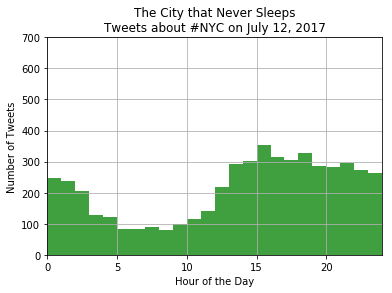

In [38]:
# Generate the histogram of the data
n, bins, patches = plt.hist(data,               # Single list of data
                            24,                 # Number of bins
                            range=(0,24),       # Range on the bins
                            facecolor='green',  # Color the bars green
                            alpha=0.75)

# Labeling axis and titles
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.title("The City that Never Sleeps\nTweets about #NYC on July 12, 2017")

# Setting axis ranges [xmin, xmax, ymin, ymax])
plt.axis([0, 24, 0, 700])

# Can turn on a grid
plt.grid(True)

# Needed to actually show the plot
plt.show()